In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

# Definición del modelo inflacionario y obtención de los datos del background

In [2]:
#Starobinsky potential
V = '3*M**2/4*(1 - exp(-sqrt(2/3)*phi) )**2'
param = {'M' : 1.3e-5}
potential = PotentialFunction.from_string(V, param_values=param) #Instancia de la clase Potential para el modelo R^2

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 5.7)
sol = background.solver()

In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)

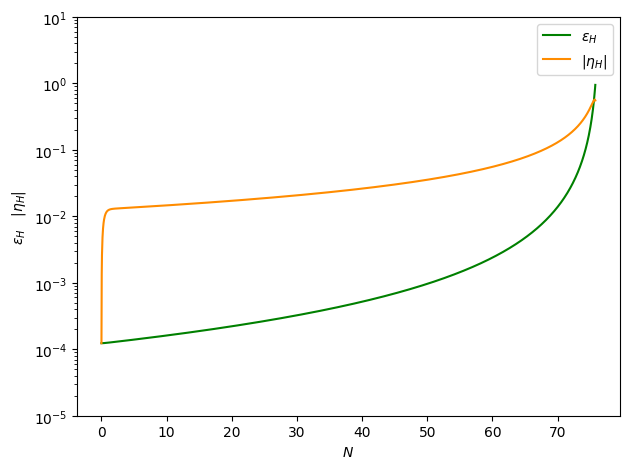

In [4]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')

plt.yscale('log')
plt.ylim(1e-5, 10)
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')
plt.tight_layout()

# Perturbaciones primordiales y espectro primordial de potencias

In [5]:
pert = Perturbations(potential, background, scale= 'CMB', N_CMB = 54.37)
sol = pert.Power_spectra_pivot()


Curvature power spectrum at pivot scale is 2.2874794154625255e-09
Tensor to scalar ratio at pivot scale is 0.003626554369460637


In [6]:
PS = pert.Power_spectrum(save = True)

Computing P(k): 100%|██████████| 1000/1000 [01:12<00:00, 13.89it/s]


/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:610: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

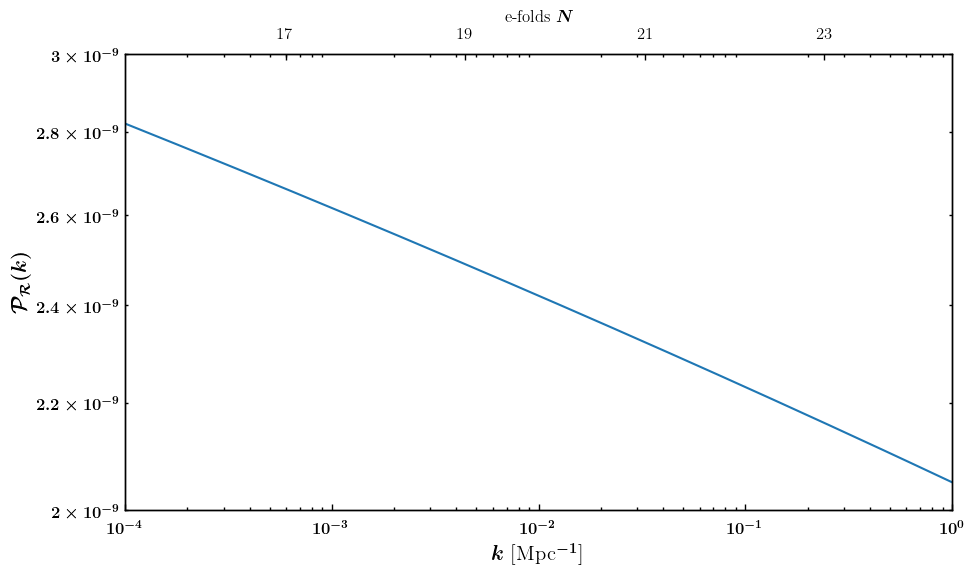

In [7]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save= True)

In [8]:
print(pert.Spectral_tilts)


{'n_s': 0.9644187022561062, 'n_t': -0.0005607081597011763}
